# Creating word vectors using word2vec

#### Load dependencies

In [9]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [10]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /home/suraj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/suraj/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [12]:
from nltk.corpus import gutenberg

In [13]:
len(gutenberg.fileids())

18

In [15]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

#### Tokenize the text

In [16]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [17]:
len(gberg_sent_tokens)

94428

In [21]:
gberg_sent_tokens[1]

u"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [20]:
word_tokenize(gberg_sent_tokens[])

[u'She',
 u'was',
 u'the',
 u'youngest',
 u'of',
 u'the',
 u'two',
 u'daughters',
 u'of',
 u'a',
 u'most',
 u'affectionate',
 u',',
 u'indulgent',
 u'father',
 u';',
 u'and',
 u'had',
 u',',
 u'in',
 u'consequence',
 u'of',
 u'her',
 u'sister',
 u"'s",
 u'marriage',
 u',',
 u'been',
 u'mistress',
 u'of',
 u'his',
 u'house',
 u'from',
 u'a',
 u'very',
 u'early',
 u'period',
 u'.']

In [22]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [24]:
gberg_sents[:5]

[[u'[', u'Emma', u'by', u'Jane', u'Austen', u'1816', u']'],
 [u'VOLUME', u'I'],
 [u'CHAPTER', u'I'],
 [u'Emma',
  u'Woodhouse',
  u',',
  u'handsome',
  u',',
  u'clever',
  u',',
  u'and',
  u'rich',
  u',',
  u'with',
  u'a',
  u'comfortable',
  u'home',
  u'and',
  u'happy',
  u'disposition',
  u',',
  u'seemed',
  u'to',
  u'unite',
  u'some',
  u'of',
  u'the',
  u'best',
  u'blessings',
  u'of',
  u'existence',
  u';',
  u'and',
  u'had',
  u'lived',
  u'nearly',
  u'twenty',
  u'-',
  u'one',
  u'years',
  u'in',
  u'the',
  u'world',
  u'with',
  u'very',
  u'little',
  u'to',
  u'distress',
  u'or',
  u'vex',
  u'her',
  u'.'],
 [u'She',
  u'was',
  u'the',
  u'youngest',
  u'of',
  u'the',
  u'two',
  u'daughters',
  u'of',
  u'a',
  u'most',
  u'affectionate',
  u',',
  u'indulgent',
  u'father',
  u';',
  u'and',
  u'had',
  u',',
  u'in',
  u'consequence',
  u'of',
  u'her',
  u'sister',
  u"'",
  u's',
  u'marriage',
  u',',
  u'been',
  u'mistress',
  u'of',
  u'his',
  

In [25]:
gberg_sents[4][14]

u'father'

In [26]:
len(gutenberg.words())

2621613

#### Run word2vec

In [27]:
# model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42)

In [28]:
# model.save('raw_gutenberg_model.w2v')

In [29]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [33]:
model.wv['dog']

array([ 0.09775092, -0.13185708,  0.2835151 , -0.18527056, -0.18195345,
       -0.09006901, -0.13526492, -0.20549867,  0.25688204, -0.588159  ,
        0.16463278, -0.14950708,  0.14891449,  0.21181867,  0.03644608,
        0.12058116,  0.45439354,  0.6548919 , -0.1548728 , -0.01112838,
       -0.26477614, -0.5214006 , -0.26607147,  0.09672694,  0.06995571,
        0.21435453, -0.01182506, -0.4503936 , -0.15447748, -0.20585835,
       -0.5420723 ,  0.05313806, -0.08825062, -0.07185712, -0.00451991,
       -0.34325632,  0.19966413, -0.69312596,  0.06824194,  0.15079032,
        0.3176812 ,  0.05099431,  0.33643672,  0.24167867, -0.08353576,
       -0.5881547 , -0.32963225,  0.27191168,  0.10240607, -0.08335061,
        0.26236477, -0.28061104, -0.55954033,  0.06547181, -0.10744677,
       -0.36522558,  0.16855665, -0.03385988,  0.7342999 , -0.21805848,
       -0.1019304 , -0.15529332, -0.08604855, -0.41342112], dtype=float32)

In [34]:
len(model.wv['dog'])

64

In [35]:
model.wv.most_similar('dog')

[(u'puppy', 0.816807746887207),
 (u'cage', 0.7783445119857788),
 (u'sweeper', 0.7712647318840027),
 (u'shell', 0.7679502964019775),
 (u'pet', 0.7602192163467407),
 (u'thief', 0.753828227519989),
 (u'lazy', 0.7495452165603638),
 (u'boy', 0.7406175136566162),
 (u'fox', 0.7397206425666809),
 (u'pig', 0.7352126240730286)]

In [41]:
words = list(model.wv.vocab)
print len(words)

17011


In [42]:
model.wv.most_similar('father')

[(u'mother', 0.8617367744445801),
 (u'brother', 0.8467772006988525),
 (u'sister', 0.817445695400238),
 (u'Amnon', 0.7846659421920776),
 (u'wife', 0.7763078212738037),
 (u'daughter', 0.7633870840072632),
 (u'servant', 0.736810564994812),
 (u'uncle', 0.7364535331726074),
 (u'Tamar', 0.7359731197357178),
 (u'concubine', 0.7298693656921387)]

#### Reduce word vector dimensionality

In [44]:
X = model.wv[model.wv.vocab]

In [47]:
# tsne = TSNE(n_components=2, n_iter=1000, verbose=True) # 200 is minimum iter; default is 1000
# X_2d = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17011 samples in 0.084s...
[t-SNE] Computed neighbors for 17011 samples in 66.818s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17011
[t-SNE] Computed conditional probabilities for sample 2000 / 17011
[t-SNE] Computed conditional probabilities for sample 3000 / 17011
[t-SNE] Computed conditional probabilities for sample 4000 / 17011
[t-SNE] Computed conditional probabilities for sample 5000 / 17011
[t-SNE] Computed conditional probabilities for sample 6000 / 17011
[t-SNE] Computed conditional probabilities for sample 7000 / 17011
[t-SNE] Computed conditional probabilities for sample 8000 / 17011
[t-SNE] Computed conditional probabilities for sample 9000 / 17011
[t-SNE] Computed conditional probabilities for sample 10000 / 17011
[t-SNE] Computed conditional probabilities for sample 11000 / 17011
[t-SNE] Computed conditional probabilities for sample 12000 / 17011
[t-SNE] Computed conditional probabilities for sa

In [50]:
# coords_df = pd.DataFrame(X_2d, columns=['x','y'])
# coords_df['token'] = model.wv.vocab.keys()
# coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2d representation of word vectors

In [52]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

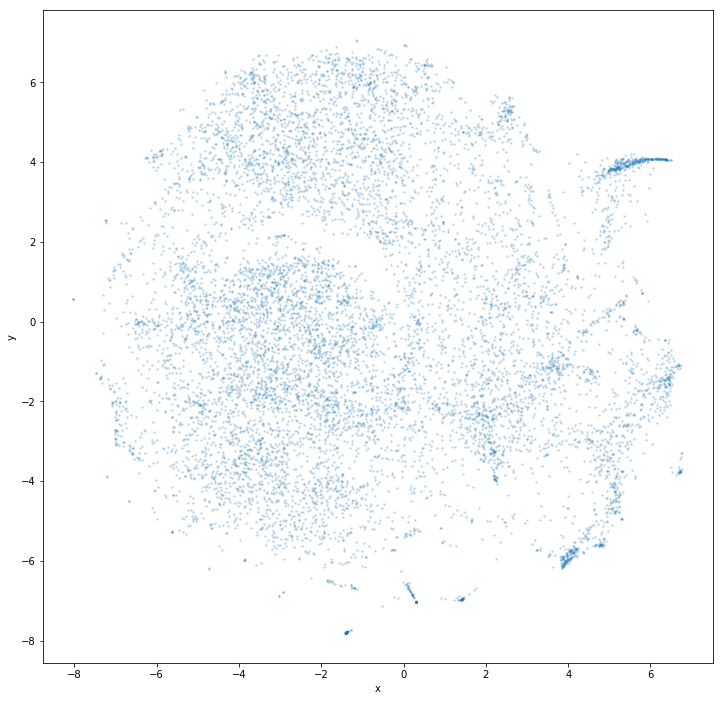

In [53]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [54]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

In [55]:
subset_df = coords_df.sample(n=5000)

In [56]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [58]:
show(p)